importing required modules

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Read csv file from local machine    

In [151]:
data= pd.read_csv('C:/Users/Sid/Projects/Covid19dataset/covid_19_clean_complete.csv')

data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
removing duplicate country name and create country_list

In [95]:
country_list=pd.Series(data['Country/Region']).drop_duplicates()
country_list

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
256    Sao Tome and Principe
257                    Yemen
258                  Comoros
259               Tajikistan
260                  Lesotho
Name: Country/Region, Length: 187, dtype: object

ploting covid cases on world map    

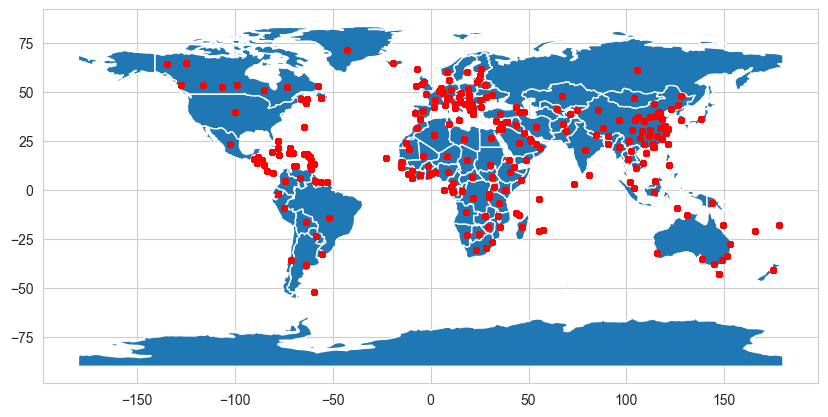

In [158]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['Long'], data['Lat'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [143]:
asia_countries=data[data['WHO Region']=='South-East Asia']

In [144]:
country_list= pd.Series(asia_countries['Country/Region']).drop_duplicates()


In [ ]:
Showing chart of COVID-19 Evolution for Asia countries

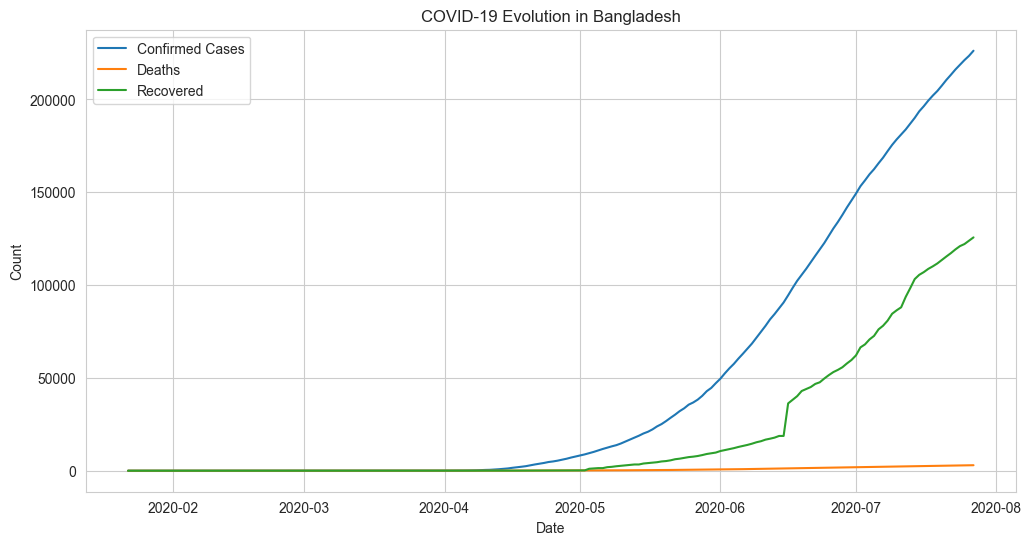

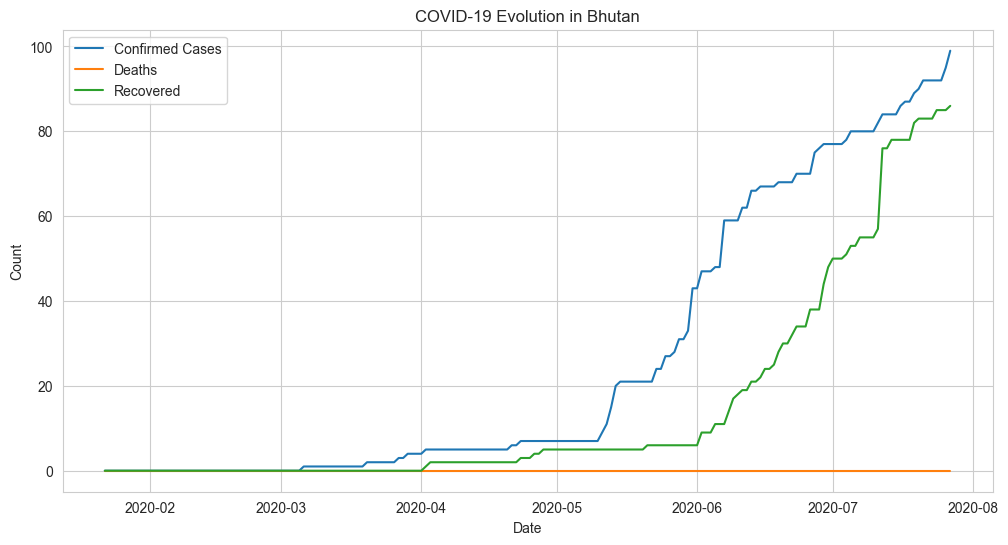

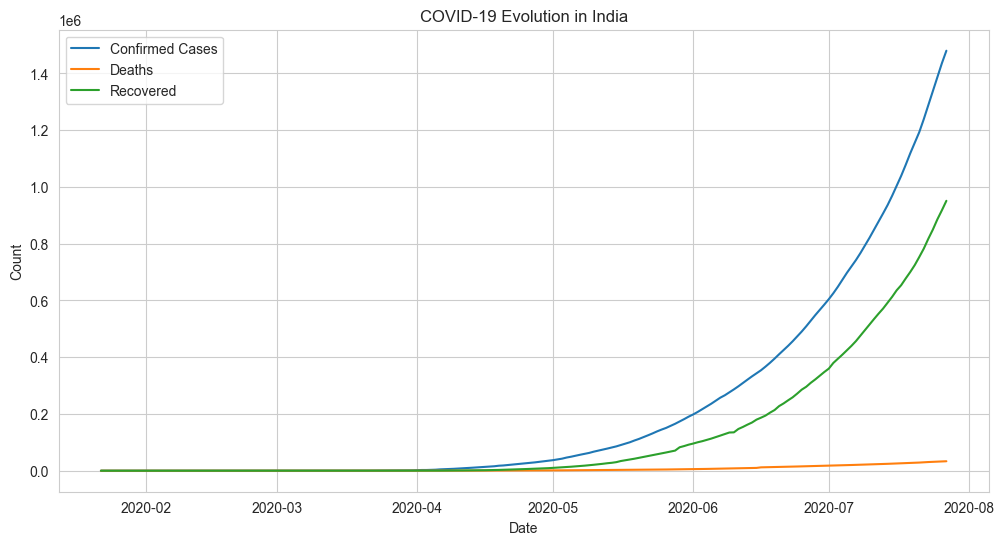

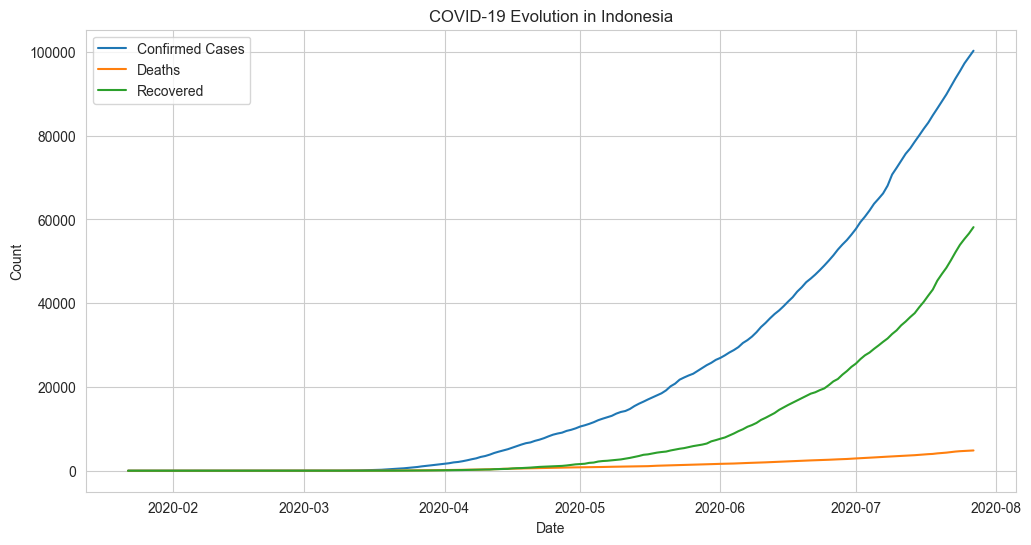

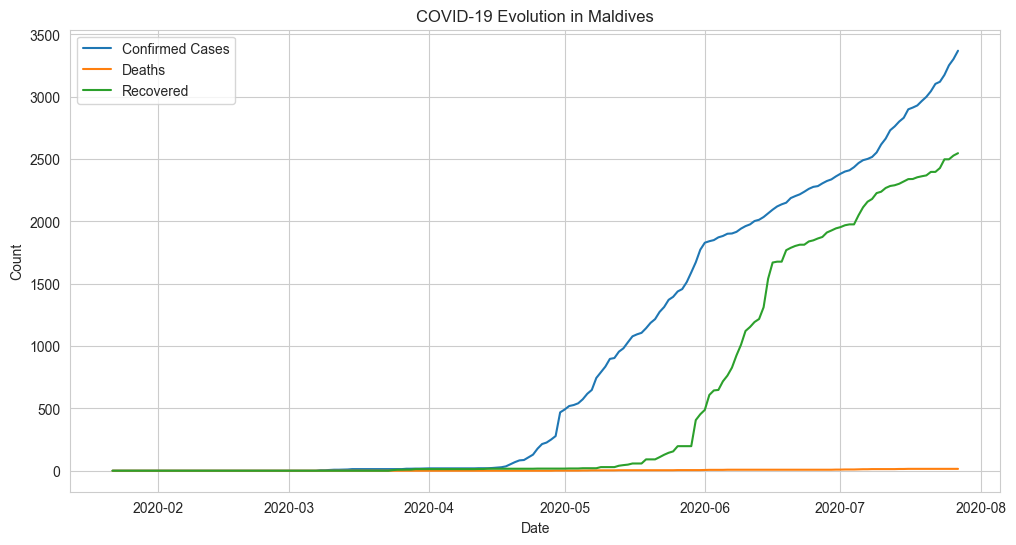

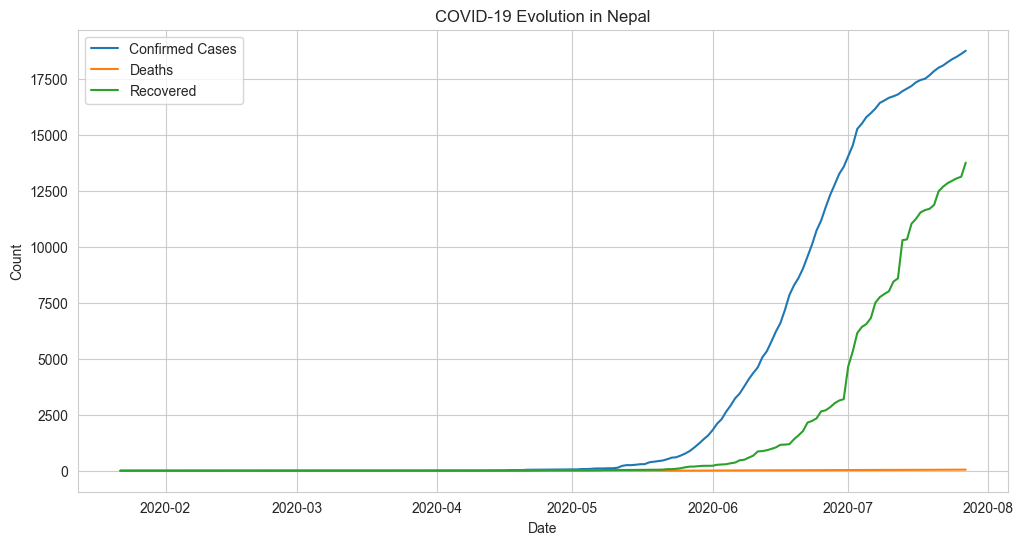

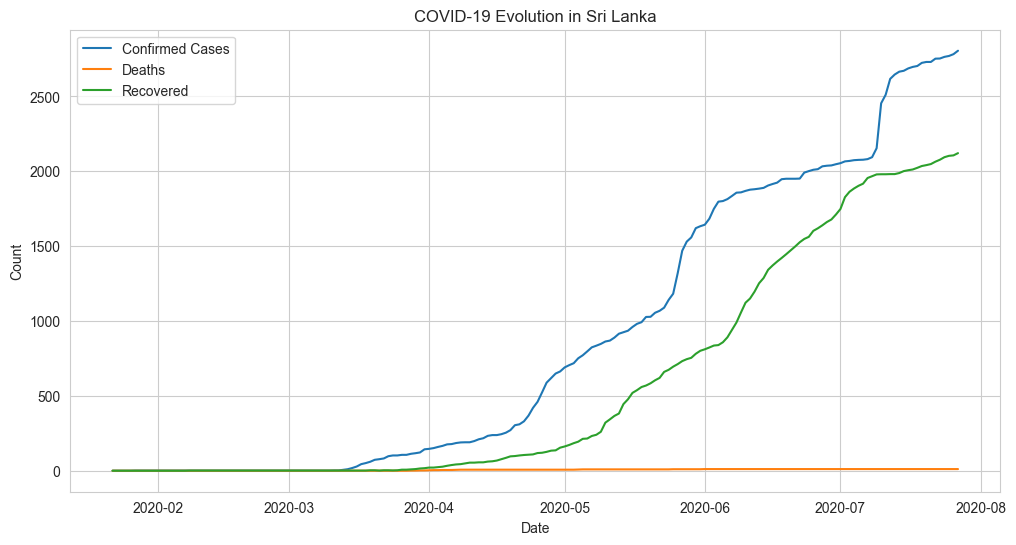

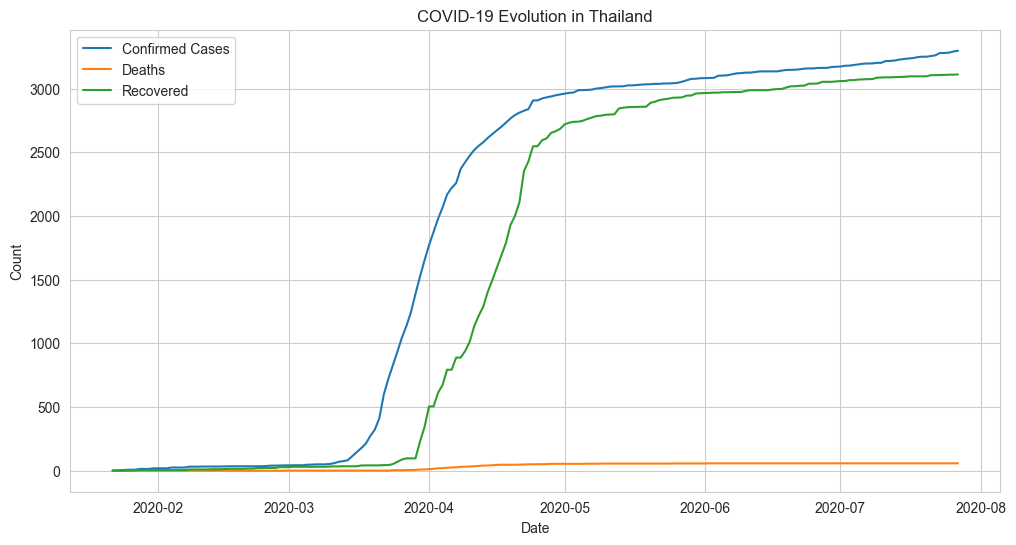

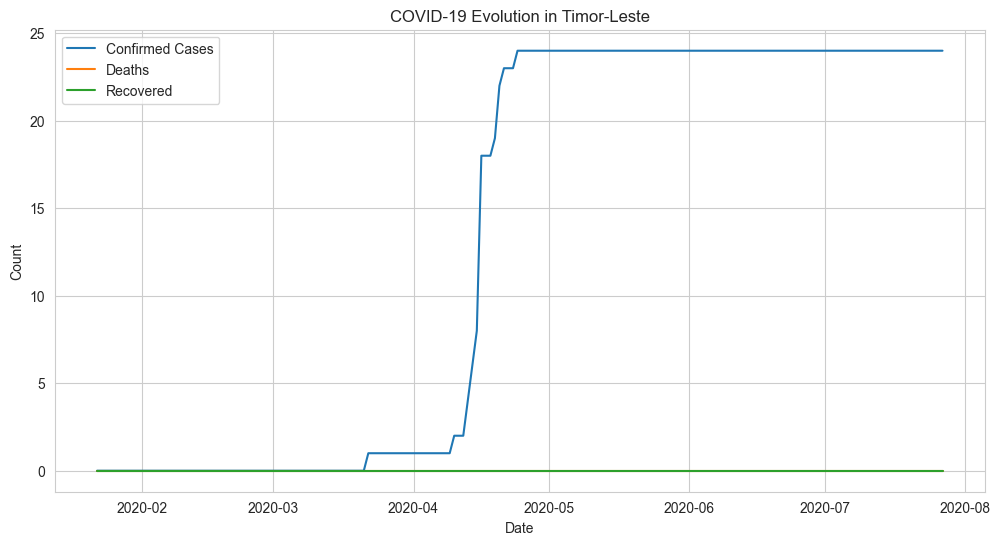

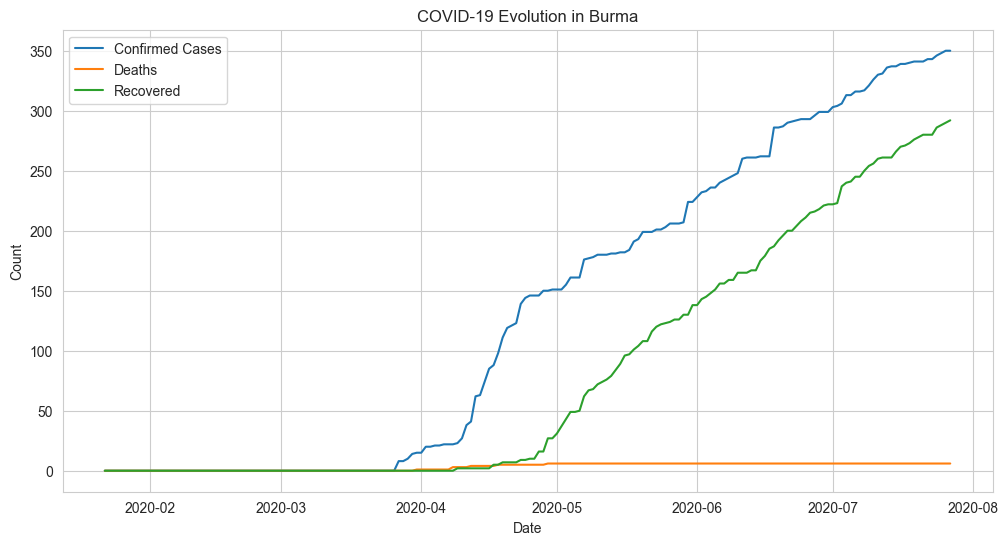

In [159]:
for country in country_list:

    # Plot the evolution of COVID-19 cases in each
    country_data = data[data['Country/Region'] == country]
    country_data['Date'] = pd.to_datetime(country_data['Date'])
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')
    plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths')
    plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered')
    plt.title(f'COVID-19 Evolution in {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [40]:
active_cases_by_region = data.groupby('WHO Region')['Active'].sum()
print('Active Cases by WHO Region:')
print(active_cases_by_region)

Active Cases by WHO Region:
WHO Region
Africa                    10158119
Americas                 225832458
Eastern Mediterranean     24108160
Europe                   106406678
South-East Asia           23629904
Western Pacific            6580031
Name: Active, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


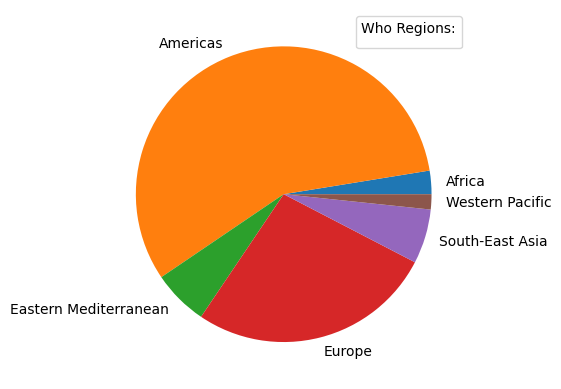

In [61]:
mylabels=list(active_cases_by_region.index)
y=active_cases_by_region.values
plt.legend(title = "Who Regions Covid case:")
plt.pie(y, labels = mylabels)
plt.show()


In [ ]:

mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
plt.pie(y, labels = mylabels)
plt.legend(title = "Who Regions:")